In [6]:
import os

def list_png_files():
    directory = os.getcwd()
    png_files = [f for f in os.listdir(directory) if f.endswith('.png')]
    return png_files

# Example usage
png_files = list_png_files()
print(png_files)


['8_crop8.png', '2_crop59.png', '20_crop9.png', '17_crop20.png', '2_crop67.png', '14_crop5.png', '14_crop14.png', '3_crop12.png', '12_crop6.png', '2_crop38.png', '4_crop69.png', '18_crop1.png', '4_crop62.png', '17_crop3.png', '10_crop6.png', '12_crop15.png', '1_crop7.png', '5_crop7.png', '17_crop1.png', '2_crop37.png', '1_crop16.png', '19_crop21.png', '7_crop6.png', '2_crop25.png', '2_crop14.png', '8_crop14.png', '19_crop25.png', '1_crop17.png', '16_crop9.png', '4_crop21.png', '22_crop11.png', '3_crop4.png', '11_crop1.png', '18_crop4.png', '2_crop20.png', '8_crop27.png', '4_crop32.png', '2_crop44.png', '16_crop16.png', '16_crop23.png', '4_crop28.png', '3_crop3.png', '4_crop51.png', '2_crop42.png', '2_crop73.png', '19_crop28.png', '19_crop16.png', '12_crop17.png', '16_crop25.png', '8_crop7.png', '2_crop57.png', '16_crop10.png', '1_crop10.png', '7_crop9.png', '19_crop12.png', '2_crop11.png', '5_crop1.png', '7_crop8.png', '17_crop17.png', '2_crop9.png', '20_crop15.png', '7_crop18.png', '1

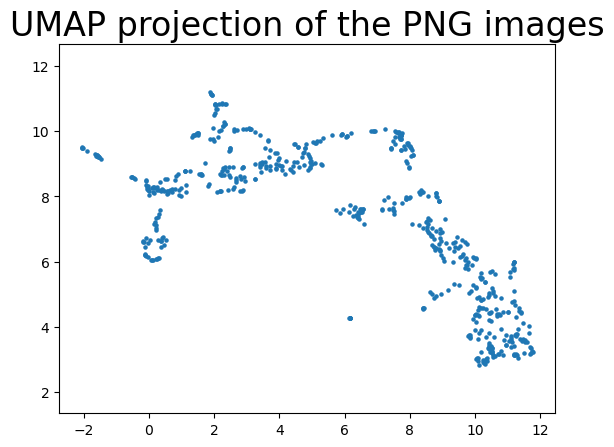

In [22]:
import numpy as np
from PIL import Image
import umap
import matplotlib.pyplot as plt

def load_images(file_list):
    directory = os.getcwd()
    images = []
    for file in file_list:
        img_path = os.path.join(directory, file)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((64, 64))  # Resize for uniformity
        img_array = np.array(img).flatten()  # Flatten the image
        images.append(img_array)
    return np.array(images)

def perform_umap(image_data, n_neighbors=5, min_dist=0, n_components=2):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components)
    embedding = reducer.fit_transform(image_data)
    return embedding

def plot_embedding(embedding):
    plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the PNG images', fontsize=24)
    plt.show()

# Example usage
png_files = list_png_files()
image_data = load_images(png_files)
embedding = perform_umap(image_data)
plot_embedding(embedding)


/home/gigo/anaconda3/envs/gordon_umap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gigo/anaconda3/envs/gordon_umap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gigo/anaconda3/envs/gordon_umap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gigo/anaconda3/envs/gordon_umap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

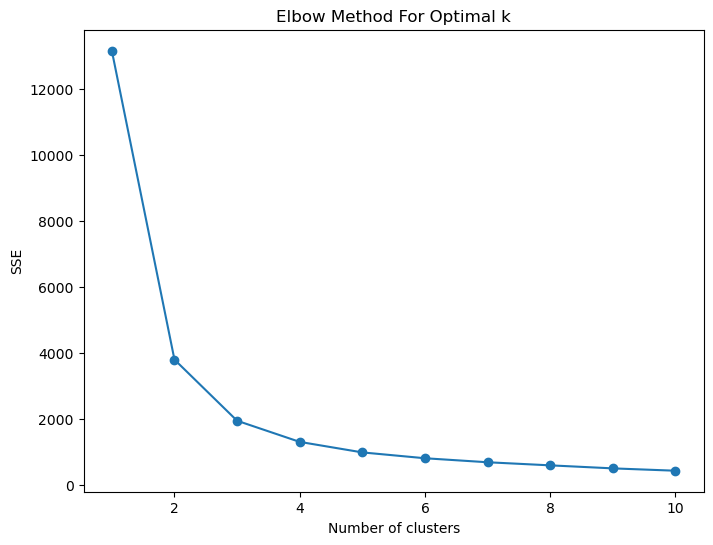

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k=10):
    iters = range(1, max_k+1)
    sse = []
    
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# Example usage
find_optimal_clusters(embedding)


/home/gigo/anaconda3/envs/gordon_umap/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


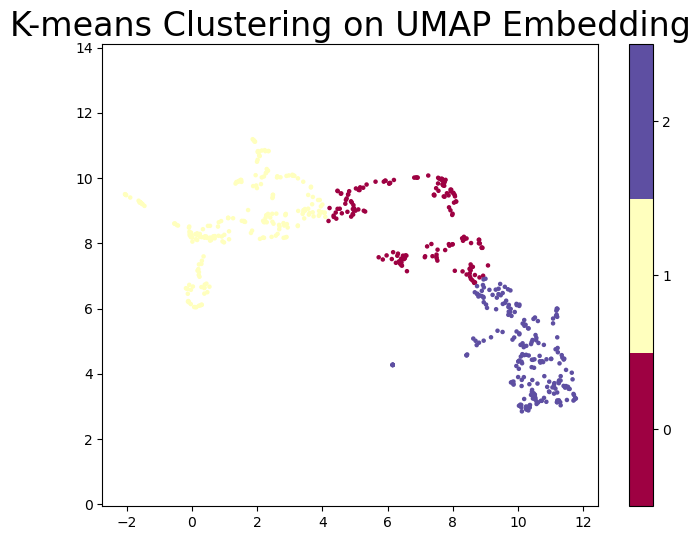

In [24]:
def perform_kmeans_clustering(embedding, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embedding)
    return cluster_labels

def plot_clusters(embedding, cluster_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(len(set(cluster_labels))+1)-0.5).set_ticks(np.arange(len(set(cluster_labels))))
    plt.title('K-means Clustering on UMAP Embedding', fontsize=24)
    plt.show()

# Example usage
optimal_k = 3  # Replace with the optimal number of clusters found using the elbow method
cluster_labels = perform_kmeans_clustering(embedding, optimal_k)
plot_clusters(embedding, cluster_labels)
